In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

This notebook selects the dimension and preprocess all the data into trainable values. 

## 1. Loading dataset

In [2]:
dataset_df = pd.read_csv('data/filtered_nrel.csv', delimiter='\t')
print('Dataset shape: ', dataset_df.shape)

Dataset shape:  (4053, 28)


The dataset contains 67622 rows and 28 columns. The top 5 rows are shown below.

## 2. Exploratory Data Analysis

In [3]:
dataset_df.drop([
    'Status Code', 'Expected Date', 'EV Other Info', 'EV Network Web',
    'Groups With Access Code', 'Access Detail Code'], axis=1, inplace=True)

In [4]:
dataset_df.head()

,Station Name,Street Address,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Latitude,Longitude,...,Open Date,EV Connector Types,Access Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access,NPS Unit Name,Maximum Vehicle Class,EV Workplace Charging
0,"Walmart 2508 - Boise, ID",8300 W. Overland Rd,24 hours daily,NaN,NaN,NaN,4.0,Electrify America,43.591420,-116.283590,...,2019-04-26,CHADEMO J1772COMBO,public,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Oxford Suites Boise - Tesla Supercharger,1426 South Entertainment Ave.,24 hours daily,NaN,NaN,NaN,8.0,Tesla,43.592251,-116.279420,...,2015-08-01,TESLA,public,NaN,NaN,NaN,NaN,NaN,NaN,False
2,BOISE STATE BRONCO CIRCLE,1402 Bronco Ln,24 hours daily,NaN,NaN,2.0,NaN,ChargePoint Network,43.601863,-116.200223,...,2020-02-27,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,False
3,CBW PROPERTIES BM-1,7196-7274 Colonial St,24 hours daily,NaN,NaN,2.0,NaN,ChargePoint Network,43.601483,-116.272221,...,2017-11-14,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,False
4,CHARGEPOINT#1 E-470 EAST,22470 E Stephen D. Hogan Parkway,24 hours daily,NaN,NaN,NaN,1.0,ChargePoint Network,39.718408,-104.725254,...,2022-04-13,CHADEMO J1772COMBO,public,NaN,NaN,NaN,NaN,NaN,NaN,False


In [5]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4053 entries, 0 to 4052
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Name                 4053 non-null   object 
 1   Street Address               4053 non-null   object 
 2   Access Days Time             3540 non-null   object 
 3   Cards Accepted               476 non-null    object 
 4   EV Level1 EVSE Num           8 non-null      float64
 5   EV Level2 EVSE Num           1782 non-null   float64
 6   EV DC Fast Count             2535 non-null   float64
 7   EV Network                   4053 non-null   object 
 8   Latitude                     4053 non-null   float64
 9   Longitude                    4053 non-null   float64
 10  Date Last Confirmed          4053 non-null   object 
 11  Owner Type Code              1935 non-null   object 
 12  Open Date                    4050 non-null   object 
 13  EV Connector Types

In [6]:
dataset_df.describe()

,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude
count,8.00000,1782.000000,2535.000000,4053.000000,4053.000000
mean,1.37500,2.287318,6.145168,38.004304,-93.601466
std,1.06066,1.622223,4.904960,5.220180,16.845066
min,1.00000,1.000000,1.000000,18.111876,-159.456719
25%,1.00000,2.000000,2.000000,34.447837,-106.341500
50%,1.00000,2.000000,4.000000,38.777042,-88.012535
75%,1.00000,2.000000,8.000000,41.578330,-80.366070
max,4.00000,18.000000,51.000000,61.573564,-65.821744


## 3. Feature Engineering

In [7]:
num_attribs = dataset_df.select_dtypes('number').columns.to_list()
cat_attribs = dataset_df.select_dtypes('object').columns.to_list()

In [8]:
num_attribs

['EV Level1 EVSE Num',
 'EV Level2 EVSE Num',
 'EV DC Fast Count',
 'Latitude',
 'Longitude']

In [9]:
cat_attribs

['Station Name',
 'Street Address',
 'Access Days Time',
 'Cards Accepted',
 'EV Network',
 'Date Last Confirmed',
 'Owner Type Code',
 'Open Date',
 'EV Connector Types',
 'Access Code',
 'Facility Type',
 'EV Pricing',
 'EV On-Site Renewable Source',
 'Restricted Access',
 'NPS Unit Name',
 'Maximum Vehicle Class']

In [10]:
dataset_df['Public_Bool'] = dataset_df['Access Code'].apply(lambda x: 1 if x == 'public' else 0)
dataset_df.drop(['Access Code'], axis=1, inplace=True)

In [11]:
dataset_df['Cards Accepted'].value_counts()

Cards Accepted
A D Debit M V                                         444
A ACCOUNT_BALANCE D M V                                 9
A CREDIT D M V                                          4
A ANDROID_PAY APPLE_PAY CREDIT D M V                    3
CREDIT                                                  3
A CREDIT D Debit M V                                    2
CREDIT Debit                                            2
A D M V                                                 2
A Cash D M V                                            1
ANDROID_PAY APPLE_PAY Debit M V                         1
Cash Checks CREDIT                                      1
A ANDROID_PAY APPLE_PAY CREDIT Debit M V                1
A ACCOUNT_BALANCE CREDIT D M V                          1
Checks                                                  1
ACCOUNT_BALANCE ANDROID_PAY APPLE_PAY CREDIT Debit      1
Name: count, dtype: int64

In [12]:
len(dataset_df['Cards Accepted'].unique())

16

In [13]:
card_list = ['A', 'CREDIT', 'Debit', 'D', 'M', 'V', 'Visa',
             'Cash', 'Checks', 'ACCOUNT_BALANCE', 'ALLIANCE',
             'ANDROID_PAY', 'APPLE_PAY']

In [14]:
for card in card_list:
    dataset_df['Card_' + card] = dataset_df['Cards Accepted'].apply(lambda x: 1 if card in str(x) else 0)
dataset_df.drop('Cards Accepted', axis=1, inplace=True)
    

<Axes: xlabel='EV Level1 EVSE Num', ylabel='Count'>

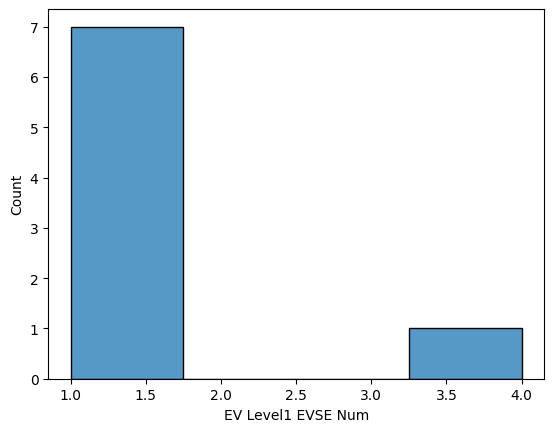

In [15]:
sns.histplot(dataset_df['EV Level1 EVSE Num'])

In [16]:
dataset_df['EV Level1 EVSE Num'].fillna(0, inplace=True)

<Axes: xlabel='EV Level2 EVSE Num', ylabel='Count'>

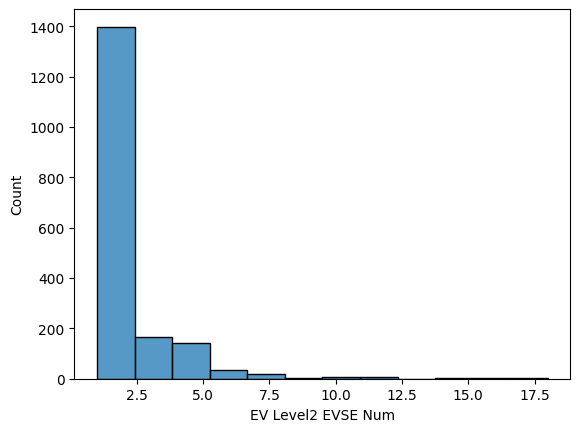

In [17]:
sns.histplot(dataset_df['EV Level2 EVSE Num'])

In [18]:
dataset_df['EV Level2 EVSE Num'].fillna(0, inplace=True)

<Axes: xlabel='EV DC Fast Count', ylabel='Count'>

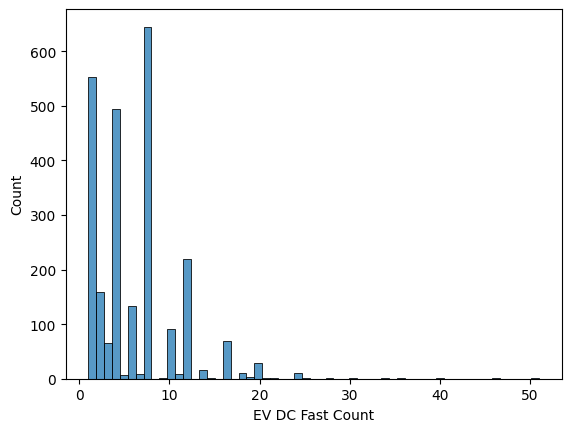

In [19]:
sns.histplot(dataset_df['EV DC Fast Count'])

In [20]:
dataset_df['EV DC Fast Count'].fillna(0, inplace=True)

In [21]:
ev_networks_list = dataset_df['EV Network'].value_counts().index.to_list()[:15]
ev_networks_list = ['ChargePoint Network',
                    'Non-Networked',
                    'Blink Network',
                    'Tesla',
                    'Volta',
                    'EV Connect',
                    'SHELL_RECHARGE',
                    'eVgo Network',
                    'Electrify America',
                    'AMPUP',
                    'FLO',
                    'RIVIAN',
                    'LIVINGSTON']

In [22]:
for network in ev_networks_list:
    dataset_df['Network_' + network] = dataset_df['EV Network'].apply(lambda x: 1 if network in str(x) else 0)
dataset_df.drop('EV Network', axis=1, inplace=True)
    

In [23]:
dataset_df['EV Pricing'].value_counts()[:20]

EV Pricing
Free                                                                                                         688
FREE                                                                                                          21
$2.00/Hr Parking Fee                                                                                           9
$1.00/Hr Parking Fee                                                                                           7
DC Fast: $7.50 per session or $19.99 for monthly plan, Level 2: $4 per session or $19.99 for monthly plan      7
Level 2: $4 per session or $19.99 for monthly plan, DC Fast: $7.50 per session or $19.99 for monthly plan      6
Free; parking fee                                                                                              3
$0.75-$3.00/Hr Variable Parking Fee                                                                            2
$2 per hour                                                                          

In [24]:
def get_electric_price(x):
    x = str(x)
    if x.lower() == 'free':
        return 0
    # Extract hourly rate
    rate = re.findall(r'(\$\d+\.?\d*)-(\$\d+\.?\d*)/kWh \w+ Energy Fee', x)
    if not rate:
        rate = re.findall(r'(\$\d+\.?\d*)/kWh Energy Fee', x)
    if not rate:
        rate = re.findall(r'(\$\d+\.?\d*) per kWh', x)
    # Convert to float if rate is found else return None
    rate = re.findall(r'\d+\.?\d*', str(rate))
    for i in range(len(rate)):
        rate[i] = float(rate[i])
    if rate:
        return np.mean(rate)
    else:
        return -1

In [25]:
def get_park_price(x):
    x = str(x)
    if str(x).lower() == 'free':
        return 0
    # Extract hourly rate
    hourly_rate = re.findall(r'(\$\d+\.?\d*)-(\$\d+\.?\d*)/Hr \w+ Parking Fee', x)
    if not hourly_rate:
        hourly_rate = re.findall(r'(\$\d+\.?\d*)/Hr Parking Fee', x)
    # Convert to float if hourly_rate is found else return None
    hourly_rate = re.findall(r'\d+\.?\d*', str(hourly_rate))
    for i in range(len(hourly_rate)):
        hourly_rate[i] = float(hourly_rate[i])
    if hourly_rate:
        return np.mean(hourly_rate)
    else:
        return -1
                                                                 

In [26]:
dataset_df['park_price'] = dataset_df['EV Pricing'].apply(get_park_price)
dataset_df['electric_price'] = dataset_df['EV Pricing'].apply(get_electric_price)
dataset_df.drop('EV Pricing', axis=1, inplace=True)

In [27]:
dataset_df.drop(['Station Name', 'Street Address', 'Access Days Time', 
                 'Date Last Confirmed', 'Open Date', 'NPS Unit Name'], axis=1, inplace=True)

In [28]:
dataset_dummies = pd.get_dummies(dataset_df['Owner Type Code'], prefix='Owner_Type')
dataset_df = pd.concat([dataset_df, dataset_dummies], axis=1)
dataset_df.drop('Owner Type Code', axis=1, inplace=True)

In [29]:
dataset_df['EV Connector Types'].value_counts().head()

EV Connector Types
TESLA                       1338
J1772                       1052
CHADEMO J1772COMBO          1032
J1772 TESLA                  283
CHADEMO J1772 J1772COMBO     205
Name: count, dtype: int64

In [30]:
connector_list = ['NEMA1450', 'NEMA515', 'NEMA520', 
                  'J1772', 'J1772COMBO', 'CHADEMO', 'TESLA']
for connector in connector_list:
    dataset_df['Connector_' + connector] = dataset_df['EV Connector Types'].apply(lambda x: 1 if connector in str(x) else 0)
dataset_df.drop('EV Connector Types', axis=1, inplace=True)

In [31]:
dataset_df['EV On-Site Renewable Source'].value_counts()

EV On-Site Renewable Source
SOLAR    8
HYDRO    3
Name: count, dtype: int64

In [32]:
dataset_dummies = pd.get_dummies(dataset_df['EV On-Site Renewable Source'], prefix='Renewable_Source')
dataset_df = pd.concat([dataset_df, dataset_dummies], axis=1)
dataset_df.drop('EV On-Site Renewable Source', axis=1, inplace=True)

In [33]:
dataset_df['Maximum Vehicle Class'].value_counts()

Maximum Vehicle Class
LD    673
MD      7
HD      1
Name: count, dtype: int64

In [34]:
def map(x):
    if x == 'LD':
        return 1
    elif x == 'MD':
        return 2
    elif x == 'HD':
        return 3
    else:
        return 0

dataset_df['Maximum_Vehicle_Class_Num'] = dataset_df['Maximum Vehicle Class'].apply(map)
dataset_df.drop('Maximum Vehicle Class', axis=1, inplace=True)

In [35]:
facilities = dataset_df['Facility Type'].value_counts()[:10].index.to_list()
facilities

['HOTEL',
 'SHOPPING_CENTER',
 'GAS_STATION',
 'CAR_DEALER',
 'GROCERY',
 'CONVENIENCE_STORE',
 'RESTAURANT',
 'PARKING_LOT',
 'SHOPPING_MALL',
 'TRAVEL_CENTER']

In [36]:
for facility in facilities:
    dataset_df['Facility_' + facility] = dataset_df['Facility Type'].apply(lambda x: 1 if facility in str(x) else 0)

In [37]:
dataset_df.drop('Facility Type', axis=1, inplace=True)

In [38]:
dataset_df['Restricted Access'] = dataset_df['Restricted Access'].apply(lambda x: 1 if x == 'True' else 0)

In [39]:
dataset_df['EV Workplace Charging'] = dataset_df['EV Workplace Charging'].apply(lambda x: 1 if x == 'True' else 0)

In [40]:
dataset_df.to_csv('data/processed_nrel.csv', index=False)